In [1]:
%%HTML
<style>
.rendered_html table, .rendered_html th, .rendered_html tr, .rendered_html td {
     font-size: 100%;
}
</style>

# Metody Numeryczne

## Układy równań liniowych – macierze prostokątne i rzadkie



### dr hab. inż. Jerzy Baranowski, Prof.AGH


# Residuum

- Ang. Residual
- Użyteczna wielkość do oceny jakości rozwiązania równania liniowego
$$
r=b-Ax
$$
- Często wykorzystujemy również normę residuum
$$
\Vert r\Vert_2=\sqrt{r^*r}
$$

# Przykład motywacyjny

Dopasowanie wielomianu do 11 punktów róownoodległych


$$
p(x)=c_0+c_1 x+c_2 x^2 +\ldots +c_{m-1} x^{m-1} 
$$

$$
\begin{bmatrix}
1&x_1&x_1^2&&x_1^{m-1}\\
1&x_2&x_2^2&\dots&x_2^{m-1}\\
1&x_3&x_3^2&&x_3^{m-1}\\
&\vdots&&\ddots&\vdots\\
1&x_m&x_m^2&\dots&x_m^{m-1}
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\c_2\\\vdots\\ c_{m-1}
\end{bmatrix}
=
\begin{bmatrix}
y_1\\y_2\\y_3\\\vdots\\ y_{m}
\end{bmatrix}
$$

In [405]:
import numpy as np
import numpy.linalg as nplin
import scipy
import matplotlib.pyplot as plt


(-1, 5)

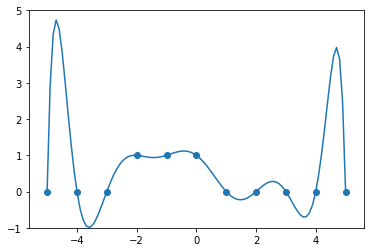

In [443]:
x=[i for i in range(-5,6)]
y=np.array([0,0,0,1,1,1,0,0,0,0,0])
A=np.vander(x,11)
c=nplin.solve(A,y)
p_int=np.poly1d(c)
X=np.linspace(-5,5,100)
plt.plot(X,p_int(X))
plt.scatter(x,y)
axes = plt.gca()
axes.set_ylim([-1,5])

# Wielomian niższego stopnia
Szukamy wielomianu 


$$
p(x)=c_0+c_1 x+c_2 x^2 +\ldots +c_{n-1} x^{n-1} 
$$

który będzie minimalizował
$$
\sum_{i=1}^m|p(x_i)-y_i|^2
$$
czyli kwadrat normy residuum układu
$$
\begin{bmatrix}
1&x_1&x_1^2&&x_1^{n-1}\\
1&x_2&x_2^2&\dots&x_2^{n-1}\\
1&x_3&x_3^2&&x_3^{n-1}\\
&\vdots&&\ddots&\vdots\\
1&x_m&x_m^2&\dots&x_m^{n-1}
\end{bmatrix}
\begin{bmatrix}
c_0\\c_1\\\vdots\\ c_{n-1}
\end{bmatrix}
=
\begin{bmatrix}
y_1\\y_2\\y_3\\\vdots\\ y_{m}
\end{bmatrix}
$$

(-1, 5)

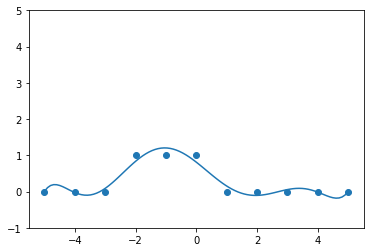

In [442]:
x=[i for i in range(-5,6)]
y=np.array([0,0,0,1,1,1,0,0,0,0,0])
plt.scatter(x,y)
A=np.vander(x,8)
c,res,r,s=nplin.lstsq(A,y,rcond=-1)
c
p_int=np.poly1d(c)
X=np.linspace(-5,5,100)
plt.plot(X,p_int(X))
axes = plt.gca()
axes.set_ylim([-1,5])

# Układ równań z macierzą prostokątną
- Układ równań z macierzą prostokątną zazwyczaj jest sprzeczny.
- Możemy go rozwiązać poprzez minimalizację normy residuum
- Jest to tzw. Problem najmniejszych kwadratów

![](img/trend.png)

# Zastosowanie - określanie trendu
- Zagadnienie popularne w ekonomii, naukach społecznych, biologii
- Duża liczba pomiarów, potrzebne ogólne przybliżenie
- Pomiary obarczone błędem – jak kompensować błąd

# Rozwiązanie problemu najmniejszych kwadratów
Dla danych $A$ o wymiarach $m \times n$ i $b$ o wymiarze $m$, wektor $x$ minimalizuje normę residuum wtedy i tylko wtedy gdy wektor residuum jest ortogonalny do wszystkich kolumn macierzy tj.
$$
A^* r=0
$$
Lub równoważnie
$$
A^*Ax=A^*b
$$

# Praktyczne wyznaczanie x

- Rozwiązanie układu równań normalnych
$$
A^*Ax=A^*b
$$
za pomocą rozkładu Choleskiego
- Przez rozkład QR
$$
\begin{aligned}
A={}&QR\\
R^*Q^*QRx={}&R^*Q^*b\\
Rx={}&Qb
\end{aligned}
$$
- za pomocą SVD
$$
\begin{aligned}
A={}&U\Sigma V^*\\
V\Sigma U^*U\Sigma V^*x={}&V\Sigma U^*b\\
\Sigma V^*x={}& U^*b\\
\Sigma y={}& U^*b\\
x={}&Vy
\end{aligned}
$$

# Metoda wyznaczania rozwiązania ma znaczenie


In [ ]:
m=100
n=15
t=np.array([i for i in range(0,m)])/(m-1)
A=np.vander(t,15)
b=np.exp(np.sin(4*t))
b=b/2006.787453080206

# ``lstsq`` w numpy

In [476]:
c,res,r,s=nplin.lstsq(A,b,rcond=-1)
w_lstsq=c[0]
w_lstsq

0.9999995505673052

# QR


In [481]:
Q,R=nplin.qr(A)
c=nplin.solve(R,Q.T@b)
w_qr=c[0]
w_qr

0.9999995178826113

# SVD

In [472]:
U,s,V=nplin.svd(A,full_matrices=False)
S=np.diag(s)
c=V.T@nplin.solve(S,U.T@b)
w_svd=c[0]
w_svd

0.9999995505595789

# Równania normalne


In [478]:
c=nplin.solve(A.T@A,A.T@b)
w_norm=c[0]
w_norm

-0.6281511821641284

# Podsumowanie błędów


In [483]:
epsilon_lstsq=np.abs(1-w_lstsq)
epsilon_qr=np.abs(1-w_qr)
epsilon_svd=np.abs(1-w_svd)
epsilon_norm=np.abs(1-w_norm)

print("Metoda lstsq: Błąd bezwzględny i względny %10.2e"%(epsilon_lstsq))
print("Rozkład QR: Błąd bezwzględny i względny %10.2e"%(epsilon_qr))
print("Rozkład SVD: Błąd bezwzględny i względny %10.2e"%(epsilon_svd))
print("Równania normalne: Błąd bezwzględny i względny %10.2e"%(epsilon_norm))



Metoda lstsq: Błąd bezwzględny i względny   4.49e-07
Rozkład QR: Błąd bezwzględny i względny   4.82e-07
Rozkład SVD: Błąd bezwzględny i względny   4.49e-07
Równania normalne: Błąd bezwzględny i względny   1.63e+00


# Dlaczego tak się dzieje?

In [486]:
print("Uwarunkowanie macierzy A: %10.2e"%(nplin.cond(A)))
print("Uwarunkowanie macierzy A*A: %10.2e"%(nplin.cond(A.T@A)))


Uwarunkowanie macierzy A:   2.27e+10
Uwarunkowanie macierzy A*A:   1.10e+18


# Więcej zastosowań
- Przeliczanie jednostek w pomiarach
-  Wszelkiego rodzaju statystyki
- Identyfikacja obiektów dynamicznych 
- Predykcja
- Modelowanie

# Problemy o dużym wymiarze

# Problem z O($m^3$)
- W praktyce obsługiwanie macierzy dla dużych m robi się kłopotliwe.
- Przykładowo Python nie radzi sobie z układami więcej niż tysięcy równań (brak pamięci)
- W zastosowaniach, mamy macierze o m=$10^5$, ale np. mających nie więcej niż 10 niezerowych elementów na wiersz.

# Macierze rzadkie
W dużych rzeczywistych problemach, ilość danych jest na tyle duża, że nie zapisuje się macierzy
w pamięci wprost


In [497]:
np.random.seed(12345)
matrixSize = 500
A=2*np.random.rand(matrixSize,matrixSize)-1
A=(A+A.T)/2
np.fill_diagonal(A, 1)
A[A < 0.95] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)

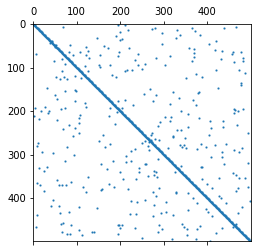

In [498]:
plt.spy(spA,markersize=1)

# Macierze rzadkie
- Istnieje wiele sposobów zapisu
    - Dictionary of Keys – odwzorowanie (wiersz, kolumna)->wartość (dobry do tworzenia macierzy)
    - Lista list (LIL) (np. kolumnami)
    - Współrzędne i wartość (COO), sortowane po wierszach a następnie kolumnach
    - Format Yale (Compressed sparse row) (trzy macierze jednowymiarowe)
- Wykorzystuje się też np.
    - symetrię macierzy (trzeba zapisać tylko połowę danych)

# Macierze pasmowe
Szczególnie ważne ze względu na zastosowania
$$
B=
\begin{bmatrix}
b_{11}&b_{12}&0&\dots&\dots&0\\
b_{21}&b_{22}&b_{22}&\ddots&\ddots&\vdots\\
0&b_{32}&b_{33}&b_{34}&\ddots&\vdots\\
\vdots&\ddots&b_{43}&b_{44}&b_{45}&0\\
\vdots&\ddots&\ddots&b_{54}&b_{55}&b_{56}\\
0&\dots&\dots&0&b_{65}&b_{66}
\end{bmatrix}
$$

# Praktyka rozwiązań iteracyjnych
![](img/praktyka.png)

# Szybkie metody dokładne
- Są szybkie metody rozwiązywania układów dokładnie:
    - Algorytm Strassena O($m^{2.807355}$)
    - Agorytm Coppersmitha-Winograda O($m^{2.372}$)
- Są one jednak w zasadzie niepraktyczne
    - Brak informacji o stabilności
    - Strassen poprawia stosunkowo niewiele
    - CW ma tak dużą stałą błędu, że nie widać poprawy w macierzach osiągalnych na obecnym sprzęcie

# Podprzestrzenie Kryłowa
- W konstrukcji metod iteracyjnych ważną rolę odgrywają podprzestrzenie Kryłowa
- Rozwiązanie jest konstruowane jako pewna kombinacja wektorów postaci 
$$ 
b, Ab, A^2b, A^3b
$$
- Podprzestrzeń skonstruowana z takich wektorów nazywana jest przestrzenią Kryłowa, przy czym:
$$
K_n=\langle b, Ab, A^2b, A^3,\ldots,A^{n-1}b\rangle
$$

# Algortytm GMRES
- Generalized Minimal RESiduals
- Idea algorytmu: W $n$ tym kroku szukamy aproksymacji rozwiązania równania za pomocą wektora $x_n\in K_n$ minmalizując normę residuum $r_n=b-Ax_n$
- Algorytm realizowany jest z wykorzystaniem tzw. Iteracji Arnoldiego i w każdym kroku sprowadza się do rozwiązania układu równań o wymiarze $n+1 \times n$.

# Przykład

1502


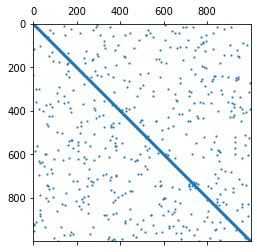

In [505]:
np.random.seed(12345)
matrixSize = 1000
A=2*np.random.rand(matrixSize,matrixSize)-1
#A=0.5*(A+A.T)
A=A
np.fill_diagonal(A, 1)
A[A < 0.999] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)
print(spA.nnz)

plt.spy(spA,markersize=1)

In [511]:
import inspect
import plotly.express as px
nmax_iter = 1
rstart = 1
tol = 1e-12
e = np.zeros((nmax_iter + 1, 1))
rr = 1

class gmres_counter(object):
   def __init__(self, disp=False):
      self._disp = disp
      self.niter = 0
      self.callbacks = []
   def __call__(self, rk=None):
      self.callbacks.append(str(rk))
      self.niter += 1
      if self._disp:
          print('%s' %(str(rk)))
        
class cg_counter(object):
   def __init__(self, disp=False):
      self._disp = disp
      self.niter = 0
      self.callbacks = []
   def __call__(self, rk=None):
      res=inspect.currentframe().f_back.f_locals['resid'] 
      self.callbacks.append(res)
      self.niter += 1
      if self._disp:
          print('%s' %(str(res)))    

# Poszukiwanie rozwiązania 

In [512]:

counter = gmres_counter()
x, info = scipy.sparse.linalg.gmres(spA, b, x0=x1, tol=tol, 
                                    callback=counter)
print(str(counter.niter))
px.scatter(x=[i for i in range(0,counter.niter)],y=counter.callbacks,log_y=True)

10


# Porównanie czasu obliczeń z LU

In [508]:
import time

T_lu=[]
T_gmres_sparse=[]


for k in range(1,100+1):

    t = time.time()
    x=nplin.solve(A, b)
    elapsed = time.time() - t

    T_lu.append(elapsed)

for k in range(1,100+1):
    t = time.time()
    #M_i=scipy.sparse.linalg.spilu(spA)
    #M2=scipy.sparse.linalg.LinearOperator((matrixSize,matrixSize),M_i.solve)
    x, info = scipy.sparse.linalg.gmres(spA, b, x0=x1, tol=tol)
    elapsed = time.time() - t
    T_gmres_sparse.append(elapsed)

In [509]:
import pandas as pd
import plotly.express as px
ans_df=pd.DataFrame({'T_LU':np.log(T_lu), 
                     #'T_GMRES' : np.log(T_gmres), 
                     'T_GMRES_sparse':np.log(T_gmres_sparse)} )
ans_df['id']=ans_df.index
tidy_ans_df=pd.wide_to_long(ans_df,stubnames='T',i='id',j='method', sep='_', suffix='\w+').reset_index().drop(columns='id')
#tidy_ans_df['method']=tidy_ans_df['method'].astype('category')
rys=px.histogram(tidy_ans_df, x='T', color='method')

# Porównanie czasu obliczeń z LU

In [513]:
rys.show()

# Macierze dodatnio określone i formy kwadratowe
Wyrażenie postaci
$$
\begin{bmatrix}
x_1&x_2
\end{bmatrix}
\begin{bmatrix}
a&b\\b&c
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2
\end{bmatrix}
=ax_1^2+2bx_1x_2+cx^2_2
$$
Nazywamy formą kwadratową. Ogólnie
$$
x^\mathsf{T}Ax=\sum_{i,j=1}^{m}a_{ij}x_ix_j
$$


# Symetryzacja 
Rozpatrujemy formy kwadratowe z macierzami symetrycznymi, ponieważ
$$
x^\mathsf{T}Ax=\frac{1}{2}x^\mathsf{T}Ax+\frac{1}{2}x^\mathsf{T}A^\mathsf{T}x=x^\mathsf{T}\frac{A+A^\mathsf{T}}{2}x
$$

# Rozszerzona postać
Często wykorzystujemy rozszerzoną postać formy kwadratowej będącą uogólnieniem funkcji kwadratowej

$$
x^\mathsf{T}Ax+b^\mathsf{T}x=\sum_{i,j=1}^{m}a_{ij}x_ix_j + \sum_{i=1}^mb_ix_i
$$

# Własności formy kwadratowej
Półdodatnia określoność
$$
x^\mathsf{T}Ax\geq0,\quad\forall x
$$
Dodatnia określoność
$$
x^\mathsf{T}Ax>0,\quad\forall x\neq0
$$

# Związek z normą euklidesową
Za pomocą form kwadratowych można definiować normy
$$
x^\mathsf{T}Ix=x^\mathsf{T}x=\Vert x \Vert^2
$$
Możliwe jest również skalowanie normy
$$
x^\mathsf{T}Hx=\Vert x \Vert_H^2
$$
Jeżeli $H$ jest ściśle dodatnio określona

# Macierz dodatnio określona
Mówimy, że macierz jest (pół) dodatnio określona jeżeli:
- Jest symetryczna oraz
- Forma kwadratowa z tą macierzą jest (pół) dodatnio określona

# Układy równań z macierzą dodatnio określoną
- W zastosowaniach układy równań z macierzą dodatnio określoną odgrywają bardzo dużą rolę
- Występują one w układach mechanicznych, elektrycznych, w analizie energii układów
- Bardzo duży obszar zastosowań obejmuje rozwiązywanie równań różniczkowych cząstkowych (równań o parametrach rozłożonych)

# Minimum formy kwadratowej 
Dla formy kwadratowej z półdodatnio określoną macierzą $A$
$$
\frac{1}{2}x^\mathsf{T}Ax+b^\mathsf{T}x
$$
punkty spełniające równanie
$$
Ax = b
$$
To punkty, w których przyjmuje ona wartość minimalną.

# Optymalizacja numeryczna
- Optymalizacja numeryczna obejmuje algorytmy, które poszukują minimum pewnej funkcji wielu zmiennych
- Wykorzystuje się często tzw. Wykresy poziomicowe
![](img/poziomice.png)

## Dla macierzy diagonalnych łatwo znaleźć minimum
![](img/diag.png)

## Macierze bardziej złożone wprowadzają dodatkowe trudności
![](img/ndiag.png)

# Metoda gradientów sprzężonych
- Koncepcja metody gradientów sprzężonych polega na tym, aby tak dobierać kierunki poszukiwania, aby zbliżać się do rozwiązania jak przy macierzy diagonalnej.
- Można tego dokonać zmieniając zmienne, ale wprowadza to duże utrudnienia obliczeniowe.
- Okazuje się, że lepiej zrobić to wykorzystując podprzestrzenie Kryłowa

# Algorytm



In [514]:
# nie wywoływać, to kod poglądowy
x_old=0
r_old=b
p_old=r_old
for i in range(0,niter+1):

    alpha=r_old.T@r_old/p_old.T@p_old #długość kroku
    x_n=x_old+alpha*p_old # przybliżenie rozwiązania
    r_n=r_old -alpha*A@p_old #residuum
    beta=r_n.T@r_n/r_old.T@r_old #poprawa w tym kierunku
    p_n=r_n+beta*p_n #nowy kierunek poszukiwania
    
    p_old=p_n
    x_old=x_n
    r_old=r_n

# Przykład

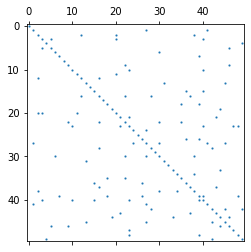

In [515]:
np.random.seed(12345)
matrixSize = 50
A=2*np.random.rand(matrixSize,matrixSize)-1
A=(A+A.T)/2
np.fill_diagonal(A, 1)
A[A < 0.7] = 0
b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)
plt.spy(spA,markersize=1)

# GMRES

In [517]:
        
counter = gmres_counter()
x, info = scipy.sparse.linalg.gmres(A, b, x0=x1, tol=tol, 
                                    callback=counter, maxiter=10000)
print(str(counter.niter))
px.scatter(x=[i for i in range(0,counter.niter)],y=counter.callbacks,log_y=True)

9455


# Gradient sprzężony

In [519]:
cnt=cg_counter()
x, info = scipy.sparse.linalg.cg(A, b, x0=x1, tol=tol,  
                                    callback=cnt)
print(str(cnt.niter))
px.scatter(x=[i for i in range(0,cnt.niter)],y=cnt.callbacks,log_y=True)

49


# Porównanie czasu obliczeń

1722


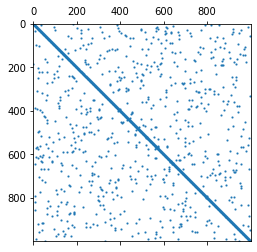

In [388]:

np.random.seed(12345)
matrixSize = 1000
A=2*np.random.rand(matrixSize,matrixSize)-1
A=0.5*(A+A.T)
np.fill_diagonal(A, 1)
A[A < 0.96] = 0

b = np.matrix(np.ones((matrixSize, 1)))
x1 = np.matrix(np.ones((matrixSize, 1)))
spA = scipy.sparse.csc_matrix (A)
print(spA.nnz)
plt.spy(spA,markersize=1)

In [520]:
T_cg=[]
T_gmres_sparse=[]

for k in range(0,50+1):
    t = time.time()
    x, info = scipy.sparse.linalg.cg(spA, b, x0=x1, tol=tol)
    elapsed = time.time() - t
    T_cg.append(elapsed)

for k in range(0,50+1):
    t = time.time()
    x, info = scipy.sparse.linalg.gmres(spA, b, x0=x1, tol=tol)
    elapsed = time.time() - t
    T_gmres_sparse.append(elapsed)    

In [521]:
ans_df=pd.DataFrame({'T_CG':np.log(T_cg), 
                     #'T_GMRES' : np.log(T_gmres), 
                     'T_GMRES_sparse':np.log(T_gmres_sparse)
                    } )
ans_df['id']=ans_df.index
tidy_ans_df=pd.wide_to_long(ans_df,stubnames='T',i='id',j='method', sep='_', suffix='\w+').reset_index().drop(columns='id')
#tidy_ans_df['method']=tidy_ans_df['method'].astype('category')
rys=px.histogram(tidy_ans_df, x='T', color='method')

# Wyniki

In [522]:
rys.show()